<a href="https://colab.research.google.com/github/roboGOD/iisc-dsp-stock-price-prediction/blob/main/src/02-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Importing processed data

In [69]:
import plotly
import plotly.graph_objects as go
import plotly.io as pio
plotly.offline.init_notebook_mode() 
# pio.renderers.default = 'plotly_mimetype'
import plotly.io as pio
pio.renderers.default = 'notebook'


In [70]:
import pandas as pd
# 'C:\Users\coolm\Notebooks\DS_IISc_Project\iisc-dsp-stock-price-prediction\datasets\processed\merged_data.csv
df = pd.read_csv(r'../datasets/processed/merged_data.csv')
df.head()

date  adj_close     close      high       low      open     volume  \
0  2010-04-01   7.108997  8.427500  8.526071  8.312500  8.478929  603145200   
1  2010-04-05   7.184915  8.517500  8.518214  8.384643  8.392143  684507600   
2  2010-04-06   7.216546  8.555000  8.580000  8.464286  8.507143  447017200   
3  2010-04-07   7.248483  8.592857  8.640000  8.523571  8.555357  628502000   
4  2010-04-08   7.228898  8.569643  8.626429  8.501429  8.587143  572989200   

  ticker    revenues  cost_of_goods  ...  current_ratio  debt_to_equity_ratio  \
0   AAPL  13499000.0      7874000.0  ...       2.644206              0.450061   
1   AAPL  13499000.0      7874000.0  ...       2.644206              0.450061   
2   AAPL  13499000.0      7874000.0  ...       2.644206              0.450061   
3   AAPL  13499000.0      7874000.0  ...       2.644206              0.450061   
4   AAPL  13499000.0      7874000.0  ...       2.644206              0.450061   

   ebitda_margin  gross_margin  net_income_margin  dividend_yield  \
0       0.314468     15.785443           0.227721             0.0   
1       0.314468     15.785443           0.227721             0.0   
2       0.314468     15.785443           0.227721             0.0   
3       0.314468     15.785443           0.227721             0.0   
4       0.314468     15.785443           0.227721             0.0   

   payout_ratio  return_on_assets  return_on_equity  return_on_capital  
0           0.0          0.054664          0.078123           0.089877  
1           0.0          0.054664          0.078123           0.089877  
2           0.0          0.054664          0.078123           0.089877  
3           0.0          0.054664          0.078123           0.089877  
4           0.0          0.054664          0.078123           0.089877  

[5 rows x 106 columns]

### Plot close price

This code is used to visualize the historical closing prices of Apple Inc. (AAPL) stock over time. It first converts the `date` column in the DataFrame to datetime objects, ensuring proper handling of time-based data. Then, a line plot is generated with the `date` on the x-axis and the closing prices (`close`) on the y-axis. The plot is labeled with "date" for the x-axis and "Close Price" for the y-axis, and the title "AAPL Close Price" is added to the chart. Finally, the plot is displayed to help identify trends, fluctuations, and patterns in the stock's performance over the selected time period.

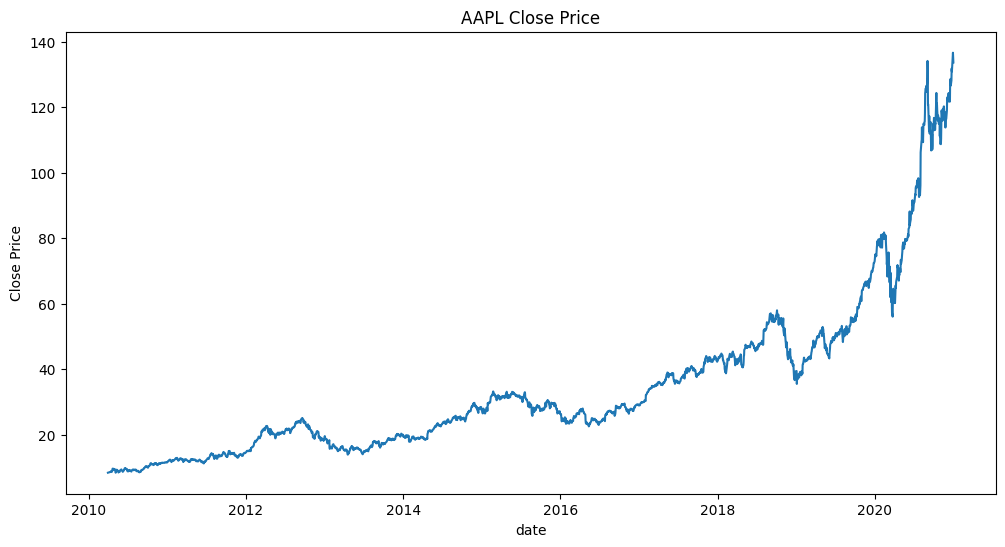

In [101]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(12, 6))
# Plot the filtered data
plt.plot(df['date'], df['close'])
plt.xlabel('date')
plt.ylabel('Close Price')
plt.title('AAPL Close Price')
plt.show()

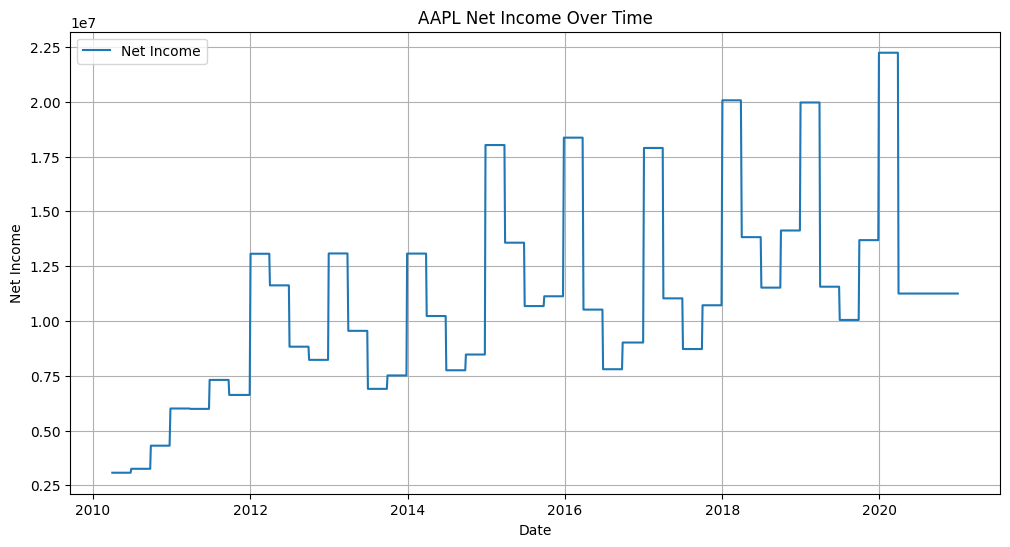

In [102]:
if 'net_income' in df.columns:
  plt.figure(figsize=(12, 6))
  plt.plot(df['date'], df['net_income'], label='Net Income')
  plt.xlabel('Date')
  plt.ylabel('Net Income')
  plt.title('AAPL Net Income Over Time')
  plt.legend()
  plt.grid(True)
  plt.show()

### Normalized Net Income

- **Normalize 'Close' and 'Net Income' Columns**  
  - The `close` and `net_income` columns are normalized using Min-Max scaling, which transforms the values to a range between 0 and 1:
    - `normalized_close`: Scales the `close` prices.
    - `normalized_net_income`: Scales the `net_income` values.

- **Plot Normalized Data**  
  - A plot is created with the `date` on the x-axis and the normalized values (`normalized_close` and `normalized_net_income`) on the y-axis.
  - The line for `normalized_close` is labeled as "Normalized Close Price," and the line for `normalized_net_income` is labeled as "Normalized Net Income."
  
- **Add Labels and Title**  
  - The x-axis is labeled as "Date," and the y-axis is labeled as "Normalized Value."
  - The title of the plot is set to "Normalized Close Price vs. Normalized Net Income."

- **Add Grid and Legend**  
  - A grid is added for better readability, and a legend is included to differentiate the two lines in the plot.

- **Display the Plot**  
  - `plt.show()` is called to display the final plot.


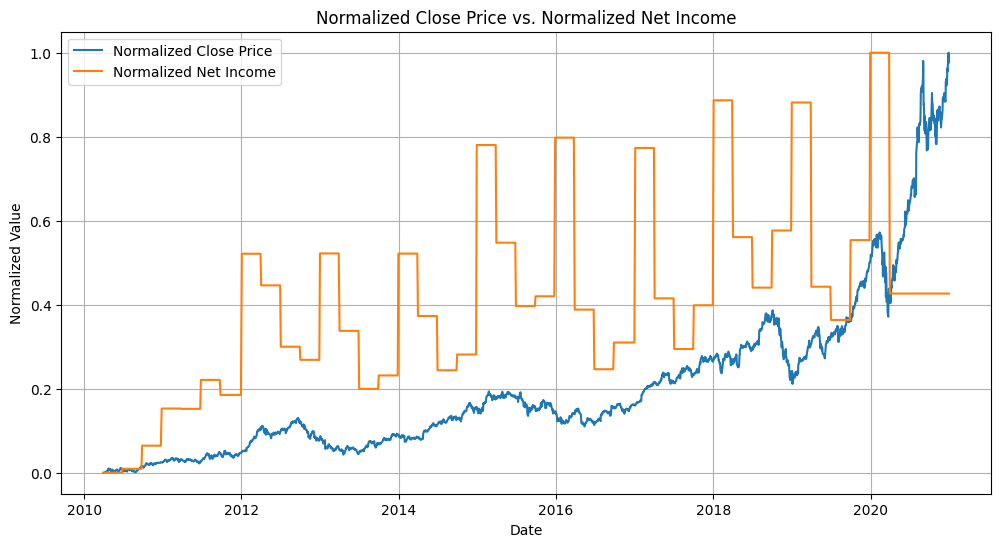

In [103]:
df['normalized_close'] = (df['close'] - df['close'].min()) / (df['close'].max() - df['close'].min())
df['normalized_net_income'] = (df['net_income'] - df['net_income'].min()) / (df['net_income'].max() - df['net_income'].min())

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['normalized_close'], label='Normalized Close Price')
plt.plot(df['date'], df['normalized_net_income'], label='Normalized Net Income')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Normalized Close Price vs. Normalized Net Income')
plt.legend()
plt.grid(True)
plt.show()

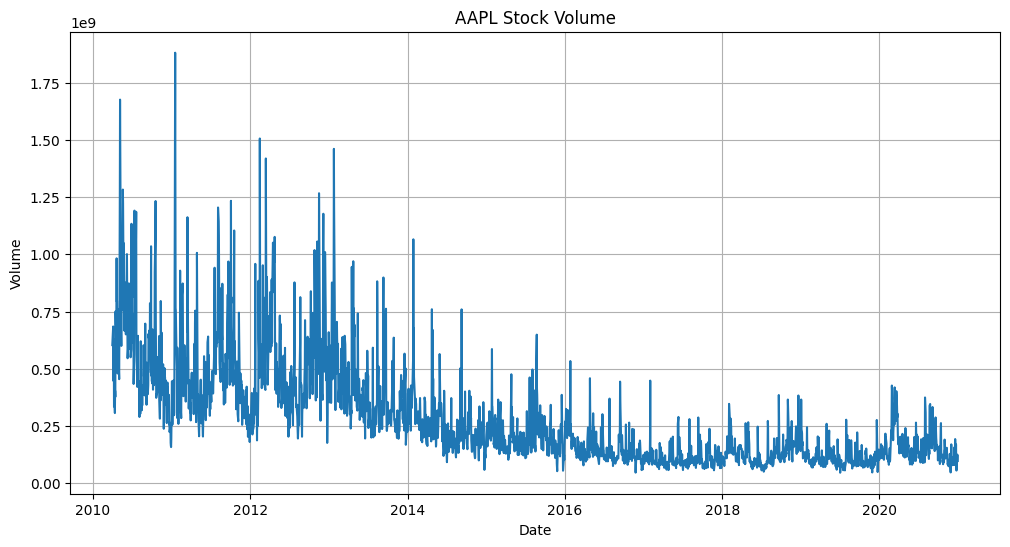

In [104]:
# Plotting Volume
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('AAPL Stock Volume')
plt.grid(True)
plt.show()

### Calculate Moving Average

- **Define Moving Average Period**  
  - `mavgd` is set to 30, specifying the number of days for the moving average calculation.

- **Calculate Moving Average**  
  - The function `calculate_moving_average()` computes the moving average for the 'close' prices using a rolling window of size `window`. It creates a new column in the DataFrame, labeled `{window}_DMA`, representing the moving average for the specified window.

- **Apply Moving Average Calculation**  
  - The function is applied to the DataFrame `df` with the moving average period (`mavgd = 30`), creating a new column called `30_DMA` containing the 30-day moving average of the 'close' price.

- **Plot Close Price and Moving Average**  
  - A plot is created with the `date` on the x-axis and both the `close` price and the calculated moving average (`30_DMA`) on the y-axis.
  - The plot displays two lines: one for the "Close Price" and another for the "30-Day Moving Average."

- **Add Labels and Title**  
  - The x-axis is labeled as "Date," and the y-axis is labeled as "Price."
  - The title of the plot is dynamically set to "AAPL Close Price and 30-Day Moving Average."

- **Add Grid and Legend**  
  - A grid is added to the plot for better readability, and a legend is included to differentiate between the "Close Price" and "30-Day Moving Average."

- **Display the Plot**  
  - `plt.show()` is called to display the final plot.


In [105]:
mavgd = 30 # Moving average days

def calculate_moving_average(df, window):
    df[f'{window}_DMA'] = df['close'].rolling(window=window, min_periods=1).mean()
    return df


df = calculate_moving_average(df, mavgd)
df = calculate_moving_average(df, 10)

In [108]:
import plotly.graph_objects as go
def plot_stock_analysis(df, lower_ma=10, higher_ma=30, show_signals=True):
    """
    Create an interactive stock price plot with candlesticks and moving averages
    
    Parameters:
    df (DataFrame): DataFrame containing stock data
    lower_ma (int): Period for lower moving average (default: 10)
    higher_ma (int): Period for higher moving average (default: 30)
    Returns:
    plotly.graph_objects.Figure
    """
    
    # Create the candlestick chart
    fig = go.Figure()

    # Add candlestick
    fig.add_trace(
        go.Candlestick(
            x=df['date'],
            open=df['open'],
            high=df['high'],
            low=df['low'],
            close=df['close'],
            name='OHLC'
        )
    )

    # Add higher period moving average
    fig.add_trace(
        go.Scatter(
            x=df['date'],
            y=df[f'{higher_ma}_DMA'],
            name=f'{higher_ma}-Day MA',
            line=dict(color='orange', width=2, dash='dash')
        )
    )

    # Add lower period moving average
    fig.add_trace(
        go.Scatter(
            x=df['date'],
            y=df[f'{lower_ma}_DMA'],
            name=f'{lower_ma}-Day MA',
            line=dict(color='blue', width=2, dash='dot')
        )
    )
    
 

    # Update layout
    fig.update_layout(
        title='AAPL Stock Price Analysis',
        yaxis_title='Stock Price',
        xaxis_title='Date',
        template='plotly_white',
        width=1000,
        height=600,
        hovermode='x unified',
        xaxis_rangeslider_visible=False
    )

    return fig

# Example usage:
# Different MA periods

fig = plot_stock_analysis(df, lower_ma=10, higher_ma=30)
fig.show()


### Label Generation

- **Define Moving Average Period for Label Generation**  
  - `labels_moving_average_days` is set to 10, specifying the number of days for the rolling average calculation used to generate the buy/sell signals.

- **Calculate Moving Average**  
  - The 10-day rolling average of the `close` price is calculated using the `rolling(window=labels_moving_average_days)` method, and a new column, `10_Day_Avg`, is added to the DataFrame to store this value.

- **Shift the Moving Average**  
  - The `10_Day_Avg` column is shifted down by 10 days (using `.shift(-labels_moving_average_days)`) to compare each day's close price with the next 10-day moving average. This shifted average is stored in a new column, `Next_10_Day_Avg`.

- **Generate Buy/Sell Signals**  
  - A new column, `signal`, is created and initialized with a default value of "SELL."
  - A condition is applied to identify where the `close` price is lower than the `Next_10_Day_Avg`. For these rows, the `signal` column is updated to "BUY."


### Rational for Choosing this as target variable

- **Difficult to predict prices in stock market due to various factors and variations.** 
- **Wile we can predict the trend up or down for a short or long period of time based on trend like Moving Average Comparision but this are lagging indicators.**
- **These indicators smoothens the prices but due to lagging indicators all the action has already been done.**
- **If we can predict the moving average cross with current close price before hand x days then we can participate in the trend early and get some benifits.**
- **The model will learn to predict these intersections beforehand.**
- **During training, we're essentially teaching the model to recognize patterns that lead to these intersections.**


This code is used to create a simple trading strategy based on comparing a stock's close price with its future moving average to generate buy and sell signals.


In [77]:
labels_moving_average_days = 10

# Calculate the {labels_moving_average_days}-day rolling average of the 'Close' price
df[f'{labels_moving_average_days}_Day_Avg'] = df['close'].rolling(window=labels_moving_average_days).mean()

# Shift the {labels_moving_average_days}-day average column down by one position to compare with the next {labels_moving_average_days} average
df[f'Next_{labels_moving_average_days}_Day_Avg'] = df[f'{labels_moving_average_days}_Day_Avg'].shift(-labels_moving_average_days)

# Create the 'Signal' column based on the comparison
df['signal'] = 'SELL'
df.loc[df['close'] < df[f'Next_{labels_moving_average_days}_Day_Avg'], 'signal'] = 'BUY'


### Plotting the target variable with closing price and moving average 

In [109]:
def plot_signals_analysis_buy_sell(df, labels_moving_average_days=10):
    """
    Visualize the prediction setup with current price, future MA, and signals
    """
    fig = go.Figure()

    # Current close price
    fig.add_trace(
        go.Scatter(
            x=df['date'],
            y=df['close'],
            name='Close Price',
            line=dict(color='blue', width=2)
        )
    )

    # Future MA (what we're trying to predict)
    fig.add_trace(
        go.Scatter(
            x=df['date'],
            y=df[f'Next_{labels_moving_average_days}_Day_Avg'],
            name=f'Future {labels_moving_average_days}-Day MA',
            line=dict(color='orange', width=2, dash='dash')
        )
    )
    
    # Current MA (for reference)
    fig.add_trace(
        go.Scatter(
            x=df['date'],
            y=df[f'{labels_moving_average_days}_Day_Avg'],
            name=f'Current {labels_moving_average_days}-Day MA',
            line=dict(color='red', width=2)
        )
    )

    # Buy signals
    buy_signals = df[df['signal'] == 'BUY']
    fig.add_trace(
        go.Scatter(
            x=buy_signals['date'],
            y=buy_signals['close'],
            mode='markers',
            name='Buy Signal',
            marker=dict(
                symbol='triangle-up',
                size=12,
                color='green',
                line=dict(width=2)
            )
        )
    )
    
    # Sell signals
    sell_signals = df[df['signal'] == 'SELL']
    fig.add_trace(
        go.Scatter(
            x=sell_signals['date'],
            y=sell_signals['close'],
            mode='markers',
            name='Sell Signal',
            marker=dict(
                symbol='triangle-down',
                size=12,
                color='red',
                line=dict(width=2)
            )
        )
    )

    fig.update_layout(
        title=f'Price Movement Prediction Setup (Future {labels_moving_average_days}-Day MA)',
        yaxis_title='Price',
        xaxis_title='Date',
        template='plotly_white',
        width=1000,
        height=600,
        hovermode='x unified',
        showlegend=True,
         # Add grid
        xaxis=dict(
            showgrid=True,
            gridwidth=1,
            gridcolor='LightGray'
        ),
        yaxis=dict(
            showgrid=True,
            gridwidth=1,
            gridcolor='LightGray'
        ),
        plot_bgcolor='white'  # White background to make grid more visible
    )


    return fig

# Visualize the prediction setup
fig = plot_signals_analysis_buy_sell(df, labels_moving_average_days=10)
fig.show()

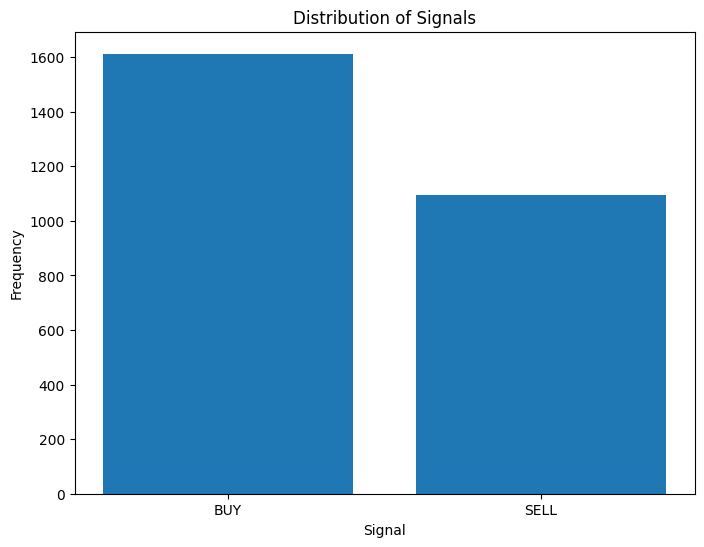

In [110]:
# Count the occurrences of each signal
signal_counts = df['signal'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(signal_counts.index, signal_counts.values)
plt.xlabel("Signal")
plt.ylabel("Frequency")
plt.title("Distribution of Signals")
plt.show()

### Scatter Plot for BUY/SELL signals

- **Purpose of Buy/Sell Signals**  
  The code generates buy and sell signals based on the comparison between the current stock price and its moving average. These signals can be used to develop a simple trading strategy:
  - **BUY**: When the current price is below the future moving average, it suggests a potential upward movement, and a "BUY" signal is generated.
  - **SELL**: When the current price is above the future moving average, it indicates that the price might decline, and a "SELL" signal is generated.

- **Plotting Buy and Sell Signals**  
  The plot visualizes these buy and sell signals on the stock's price chart:
  - **Green Circles (BUY Signals)**: Represent points where the stock price is below the expected moving average, suggesting a buying opportunity.
  - **Red Circles (SELL Signals)**: Represent points where the stock price is above the expected moving average, indicating a potential selling point.

### What the Plot Shows

- The plot displays the stock’s closing price over time, with **green dots** indicating where the algorithm suggests buying the stock, and **red dots** marking suggested sell points.
- The x-axis represents the **date**, showing the timeline over which these decisions were made, while the y-axis represents the **close price** of the stock.
- The combination of the price trend and these signals can help visualize potential entry and exit points for a trading strategy based on historical price movements and moving averages.


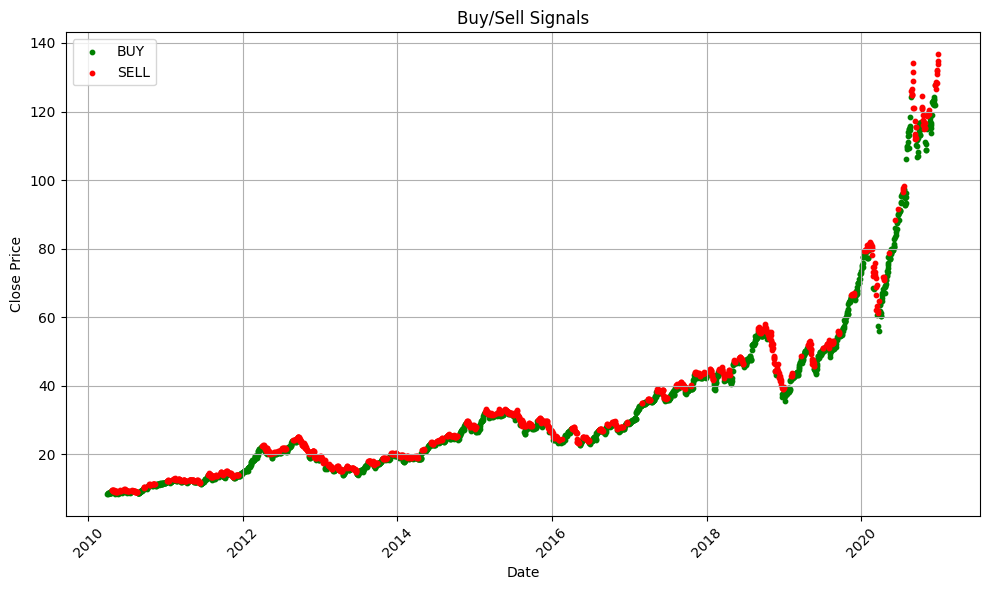

In [112]:
plt.figure(figsize=(10, 6))

# Plot BUY signals
plt.scatter(df[df['signal'] == 'BUY']['date'], df[df['signal'] == 'BUY']['close'],
            marker='o', color='green', label='BUY', s=10)
# Plot SELL signals
plt.scatter(df[df['signal'] == 'SELL']['date'], df[df['signal'] == 'SELL']['close'],
            marker='o', color='red', label='SELL', s=10)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Buy/Sell Signals')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Find Cumulative Profit

The code simulates a simple trading strategy where buy and sell signals are used to track the cumulative profit of a stock position. The goal is to calculate the profit from buying and selling stocks based on a series of buy and sell signals.

- **Initialization**:  
  The following variables are initialized to track the trading process:
  - `stock_quantity`: Tracks how many stocks are held at any given point in time.
  - `total_buy_price`: Tracks the total price spent on buying stocks.
  - `stock_profit`: Tracks the profit made from each sell transaction.
  - `quantity` and `buy_price` are set to 0 initially, representing no stock purchased.

- **Iterating Through the Data**:  
  The code then iterates over each row of the DataFrame (`df`), simulating trading based on buy (`'BUY'`) and sell (`'SELL'`) signals.
  
  - **When the signal is 'BUY'**:  
    - The quantity of stocks held (`quantity`) is increased by 1 (simulating the purchase of one stock).
    - The total buy price (`buy_price`) is updated by adding the stock’s closing price.
    - The DataFrame is updated to reflect the current quantity of stock and total purchase price.

  - **When the signal is 'SELL'** (and there are stocks to sell):  
    - The profit from selling is calculated as:  
      
      Profit = (quantity * current close price) - total buy price
      
    - After selling, the stock quantity and total buy price are reset to 0, and the profit for that sell transaction is recorded in the DataFrame.

  - **When there is no buy or sell signal ('Hold' condition)**:  
    - If no action is taken (i.e., when the signal is not 'BUY' or 'SELL'), the stock holdings and total buy price remain unchanged.

- **Cumulative Profit Calculation**:  
  After processing the signals, the cumulative profit is calculated using `cumsum()`, which returns the running total of profits up to each point in time. The cumulative profit reflects the overall performance of the simulated trading strategy up to each date in the DataFrame.

- This simulation calculates the cumulative profit or loss for a strategy based on buy and sell signals.
- **Cumulative Profit**: The final column, `cumulative_profit`, tracks the total profit from all completed buy/sell transactions as the algorithm progresses through the dataset. This gives a clear picture of how much profit would have been accumulated over time based on the trading signals provided.


In [81]:
import numpy as np

# Initialize variables to track buying and selling
df['stock_quantity'] = 0.0
df['total_buy_price'] = 0.0
df['stock_profit'] = 0.0
quantity = 0.0
buy_price = 0.0

# Iterate through the DataFrame to simulate trading based on signals
for i in range(len(df)):
    if df['signal'][i] == 'BUY':
        # Simulate buying one stock
        quantity += 1
        buy_price += df['close'][i]
        df.loc[i, 'stock_quantity'] = quantity
        df.loc[i, 'total_buy_price'] = buy_price

    elif df['signal'][i] == 'SELL' and quantity > 0:
        # Simulate selling all held stock
        profit = quantity * df['close'][i] - buy_price
        df.loc[i, 'stock_profit'] = profit
        df.loc[i, 'stock_quantity'] = 0  # Reset quantity after selling
        df.loc[i, 'total_buy_price'] = 0  # Reset buy price after selling
        buy_price = 0
        quantity = 0

    else:
        # Hold the stock
        df.loc[i, 'stock_quantity'] = quantity
        df.loc[i, 'total_buy_price'] = buy_price


# Calculate cumulative profit
df['cumulative_profit'] = df['stock_profit'].cumsum()

In [82]:
df

date   adj_close       close        high         low        open  \
0    2010-04-01    7.108997    8.427500    8.526071    8.312500    8.478929   
1    2010-04-05    7.184915    8.517500    8.518214    8.384643    8.392143   
2    2010-04-06    7.216546    8.555000    8.580000    8.464286    8.507143   
3    2010-04-07    7.248483    8.592857    8.640000    8.523571    8.555357   
4    2010-04-08    7.228898    8.569643    8.626429    8.501429    8.587143   
...         ...         ...         ...         ...         ...         ...   
2702 2020-12-23  128.059906  130.960007  132.429993  130.779999  132.160004   
2703 2020-12-24  129.047501  131.970001  133.460007  131.100006  131.320007   
2704 2020-12-28  133.662994  136.690002  137.339996  133.509995  133.990005   
2705 2020-12-29  131.883286  134.869995  138.789993  134.339996  138.050003   
2706 2020-12-30  130.758759  133.720001  135.990005  133.399994  135.580002   

         volume ticker    revenues  cost_of_goods  ...  normalized_net_income  \
0     603145200   AAPL  13499000.0      7874000.0  ...               0.000000   
1     684507600   AAPL  13499000.0      7874000.0  ...               0.000000   
2     447017200   AAPL  13499000.0      7874000.0  ...               0.000000   
3     628502000   AAPL  13499000.0      7874000.0  ...               0.000000   
4     572989200   AAPL  13499000.0      7874000.0  ...               0.000000   
...         ...    ...         ...            ...  ...                    ...   
2702   88223700   AAPL  58313000.0     35943000.0  ...               0.426626   
2703   54930100   AAPL  58313000.0     35943000.0  ...               0.426626   
2704  124486200   AAPL  58313000.0     35943000.0  ...               0.426626   
2705  121047300   AAPL  58313000.0     35943000.0  ...               0.426626   
2706   96452100   AAPL  58313000.0     35943000.0  ...               0.426626   

          30_DMA      10_DMA  10_Day_Avg  Next_10_Day_Avg  signal  \
0       8.427500    8.427500         NaN         8.668214     BUY   
1       8.472500    8.472500         NaN         8.698857     BUY   
2       8.500000    8.500000         NaN         8.716893     BUY   
3       8.523214    8.523214         NaN         8.783393     BUY   
4       8.532500    8.532500         NaN         8.878107     BUY   
...          ...         ...         ...              ...     ...   
2702  122.093333  126.955000  126.955000              NaN    SELL   
2703  122.509333  127.828001  127.828001              NaN    SELL   
2704  123.092000  129.256001  129.256001              NaN    SELL   
2705  123.612333  130.565000  130.565000              NaN    SELL   
2706  124.059666  131.149001  131.149001              NaN    SELL   

      stock_quantity  total_buy_price  stock_profit  cumulative_profit  
0                1.0         8.427500           0.0           0.000000  
1                2.0        16.945000           0.0           0.000000  
2                3.0        25.500000           0.0           0.000000  
3                4.0        34.092857           0.0           0.000000  
4                5.0        42.662500           0.0           0.000000  
...              ...              ...           ...                ...  
2702             0.0         0.000000           0.0        4631.666698  
2703             0.0         0.000000           0.0        4631.666698  
2704             0.0         0.000000           0.0        4631.666698  
2705             0.0         0.000000           0.0        4631.666698  
2706             0.0         0.000000           0.0        4631.666698  

[2707 rows x 117 columns]

In [83]:
df[df['stock_profit']<0]["stock_profit"].count()

2

In [113]:
# Count profits and losses
profit_count = df[df['stock_profit'] > 0]['stock_profit'].count()
loss_count = df[df['stock_profit'] < 0]['stock_profit'].count()
neutral_count = df[df['stock_profit'] == 0]['stock_profit'].count()

print(f"Number of profitable trades: {profit_count}")
print(f"Number of losing trades: {loss_count}")
print(f"Number of neutral trades: {neutral_count}")

# Create visualization of profit/loss occurrences
fig = go.Figure()

# Plot all profits/losses
fig.add_trace(
    go.Scatter(
        x=df['date'],
        y=df['stock_profit'],
        mode='markers',
        name='All Trades',
        marker=dict(
            color=df['stock_profit'].apply(lambda x: 'green' if x > 0 else 'red' if x < 0 else 'gray'),
            size=12
        ),
        visible=True
    )
)

# Plot only profitable trades
fig.add_trace(
    go.Scatter(
        x=df[df['stock_profit'] > 0]['date'],
        y=df[df['stock_profit'] > 0]['stock_profit'],
        mode='markers',
        name='Profitable Trades',
        marker=dict(color='green', size=12),
        visible=False
    )
)

# Plot only losing trades
fig.add_trace(
    go.Scatter(
        x=df[df['stock_profit'] < 0]['date'],
        y=df[df['stock_profit'] < 0]['stock_profit'],
        mode='markers',
        name='Losing Trades',
        marker=dict(color='red', size=12),
        visible=False
    )
)

# Add a horizontal line at y=0
fig.add_hline(y=0, line_dash="dash", line_color="black", opacity=0.5)

# Update layout
fig.update_layout(
    title='Stock Profit/Loss Distribution Over Time',
    xaxis_title='Date',
    yaxis_title='Profit/Loss',
    template='plotly_white',
    width=1000,
    height=600,
    showlegend=True,
    # Add grid
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='LightGray'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='LightGray'
    ),
    plot_bgcolor='white',
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.7,
            y=1.15,
            buttons=list([
                dict(label="All Trades",
                     method="update",
                     args=[{"visible": [True, False, False]},
                           {"title": "All Trades"}]),
                dict(label="Profitable Trades",
                     method="update",
                     args=[{"visible": [False, True, False]},
                           {"title": "Profitable Trades"}]),
                dict(label="Losing Trades",
                     method="update",
                     args=[{"visible": [False, False, True]},
                           {"title": "Losing Trades"}]),
            ]),
        )
    ]
)

# Add annotations for profit/loss statistics
fig.add_annotation(
    text=f"Profitable trades: {profit_count}<br>Losing trades: {loss_count}<br>Neutral trades: {neutral_count}",
    xref="paper", yref="paper",
    x=0.02, y=0.98,
    showarrow=False,
    bgcolor="white",
    bordercolor="black",
    borderwidth=1
)

fig.show()

# Calculate and display some statistics
profit_stats = {
    'Total Profit': df['stock_profit'].sum(),
    'Average Profit per Trade': df[df['stock_profit'] != 0]['stock_profit'].mean(),
    'Max Profit': df['stock_profit'].max(),
    'Max Loss': df['stock_profit'].min(),
    'Profit Standard Deviation': df['stock_profit'].std()
}

for key, value in profit_stats.items():
    print(f"{key}: {value:.2f}")

Number of profitable trades: 183
Number of losing trades: 2
Number of neutral trades: 2522


Total Profit: 4631.67
Average Profit per Trade: 25.04
Max Profit: 448.06
Max Loss: -0.09
Profit Standard Deviation: 17.34


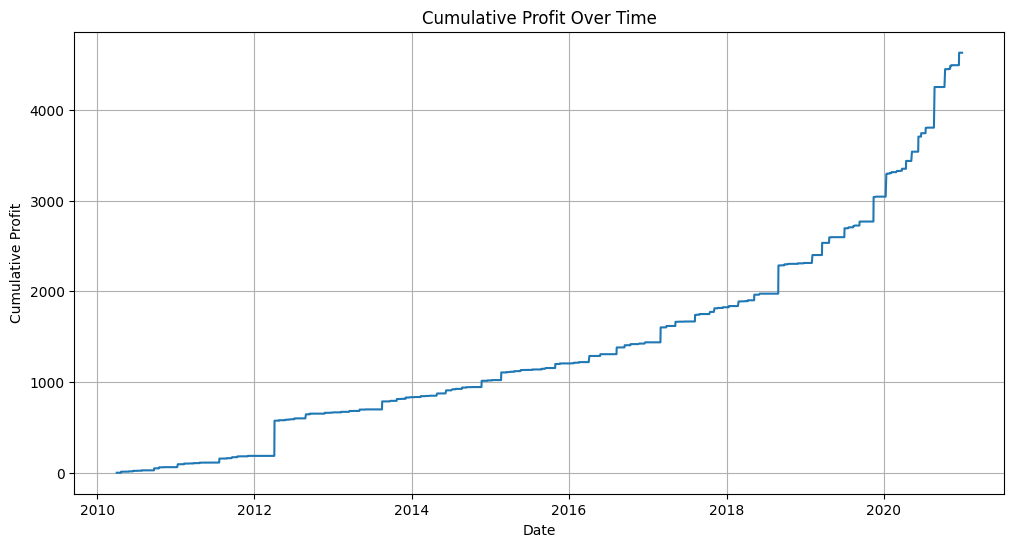

In [114]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['cumulative_profit'])
plt.xlabel('Date')
plt.ylabel('Cumulative Profit')
plt.title('Cumulative Profit Over Time')
plt.grid(True)
plt.show()

## Correlation Analysis

In [86]:
# Drop string columns
df_numeric = df.select_dtypes(exclude=['object', 'datetime64[ns]'])

# Drop columns that are not relevant to correlation analysis with closing price
columns_to_drop = ['stock_quantity', 'total_buy_price', 'stock_profit', 'high', 'low', 'adj_close', 'open',
                   'normalized_close', '10_Day_Avg', 'Next_10_Day_Avg', '30_DMA']
df_numeric = df_numeric.drop(columns=columns_to_drop, errors='ignore')

# Calculate correlation with 'close' price
correlation_with_close = df_numeric.corr()['close'].drop('close')


In [115]:
import plotly.graph_objects as go
import numpy as np

# Get correlation matrix
correlation_matrix = df_numeric.corr()

# Sort columns and index based on correlation values
# We'll use the correlation with 'close' price to sort
close_correlations = correlation_matrix['close'].abs()
sorted_columns = close_correlations.sort_values(ascending=False).index

# Reorder the correlation matrix
sorted_correlation_matrix = correlation_matrix.loc[sorted_columns, sorted_columns]

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=sorted_correlation_matrix,
    x=sorted_correlation_matrix.columns,
    y=sorted_correlation_matrix.columns,
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    text=np.round(sorted_correlation_matrix, 3),
    texttemplate='%{text}'
))

# Update layout
fig.update_layout(
    title='Sorted Correlation Matrix Heatmap',
    width=1200,
    height=1000,
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

In [117]:
top_10_correlations = correlation_with_close.abs().sort_values(ascending=False).head(10)


top_10_correlations

10_DMA                        0.998379
cumulative_profit             0.957153
debt_to_equity_ratio          0.909119
price_to_book_value           0.891101
other_assets                  0.880511
market_capitalization         0.868078
research_&_development        0.861709
enterprise_valuation          0.860277
common_stock                  0.853777
property_plant_&_equipment    0.848398
Name: close, dtype: float64

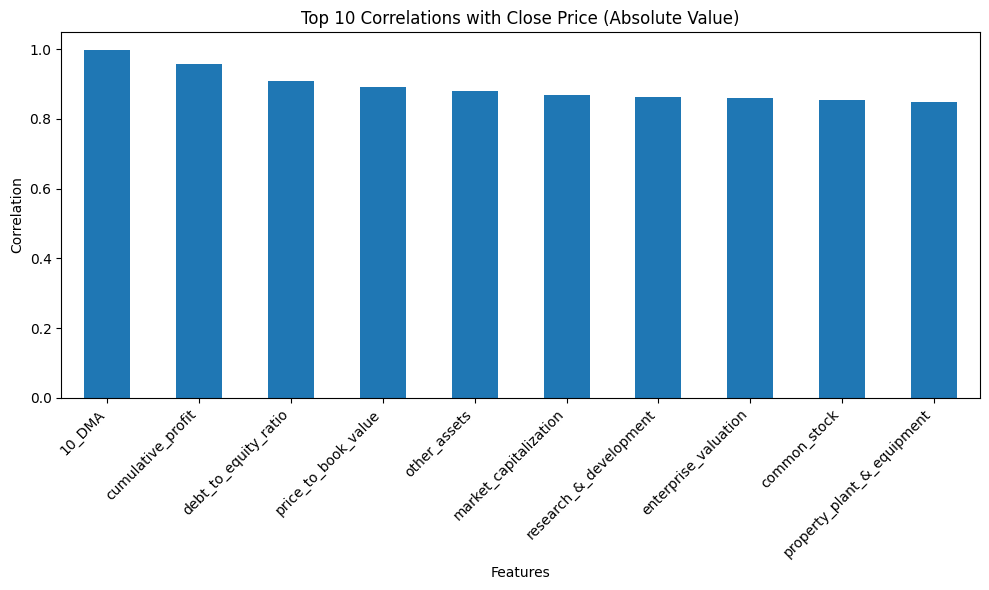

In [118]:
plt.figure(figsize=(10, 6))
top_10_correlations.plot(kind='bar')
plt.title('Top 10 Correlations with Close Price (Absolute Value)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Principal Component Analysis

In [90]:
from sklearn.decomposition import PCA
import numpy as np
import plotly.graph_objects as go

# Prepare the data
df_numeric_clean = df_numeric.drop(["close"],axis=1).dropna()

# First, fit PCA with maximum possible components
pca_full = PCA()
pca_full.fit(df_numeric_clean)

# Calculate explained variance ratio
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
fig = go.Figure()

# Add individual explained variance
fig.add_trace(go.Bar(
    x=np.arange(1, len(explained_variance_ratio) + 1),
    y=explained_variance_ratio,
    name='Individual'
))

# Add cumulative explained variance
fig.add_trace(go.Scatter(
    x=np.arange(1, len(cumulative_variance_ratio) + 1),
    y=cumulative_variance_ratio,
    name='Cumulative',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Explained Variance Ratio by Principal Components',
    xaxis_title='Number of Components',
    yaxis_title='Explained Variance Ratio',
    showlegend=True,
    width=1000,
    height=600
)

fig.show()

# Find number of components for 95% variance explained
n_components = np.argmax(cumulative_variance_ratio >= 0.99) + 1
print(f"Number of components needed for 99% variance explained: {n_components}")

# Now apply PCA with the determined number of components
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(df_numeric_clean)

# Create DataFrame with PCA results
pca_df = pd.DataFrame(
    data=pca_result,
    columns=[f'PC{i+1}' for i in range(n_components)]
)

Number of components needed for 99% variance explained: 4


In [91]:
df_numeric_clean.shape,df_numeric.shape

((2707, 102), (2707, 103))

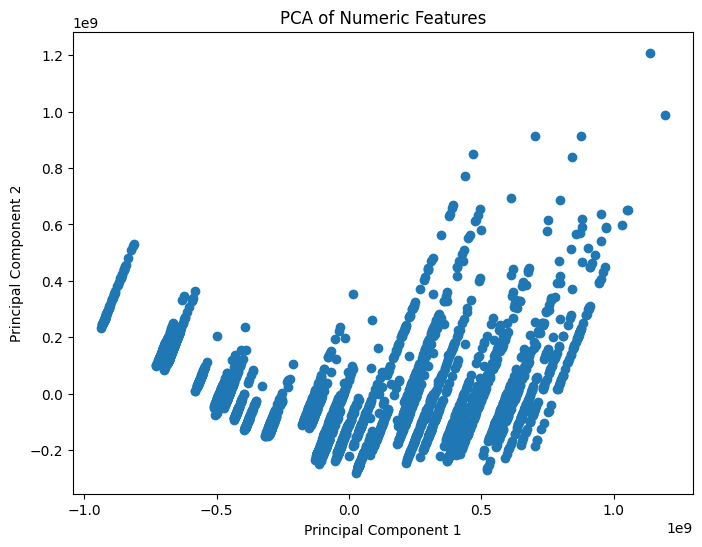

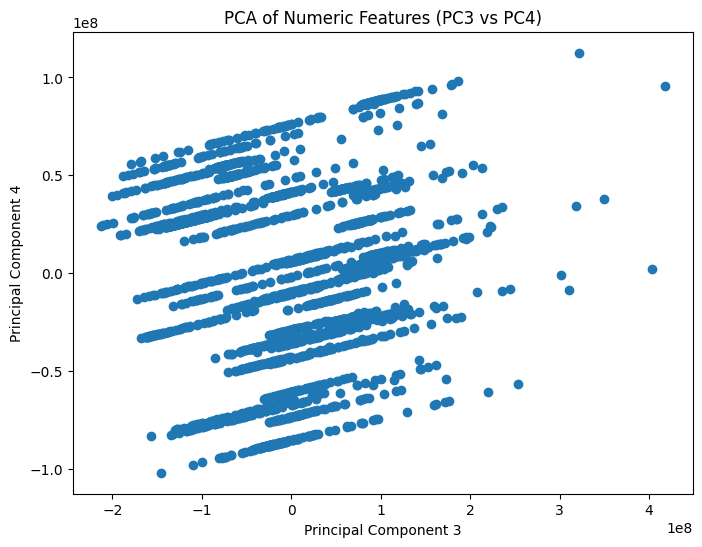

In [92]:
from sklearn.decomposition import PCA

df_numeric_clean = df_numeric.dropna()

# Apply PCA with 4 components
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_numeric_clean)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Plot the data (example using PC1 and PC2)
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Numeric Features')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC3'], pca_df['PC4'])
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('PCA of Numeric Features (PC3 vs PC4)')
plt.show()

In [93]:
pca_indices = pca_df.index

new_df = df.loc[pca_indices]

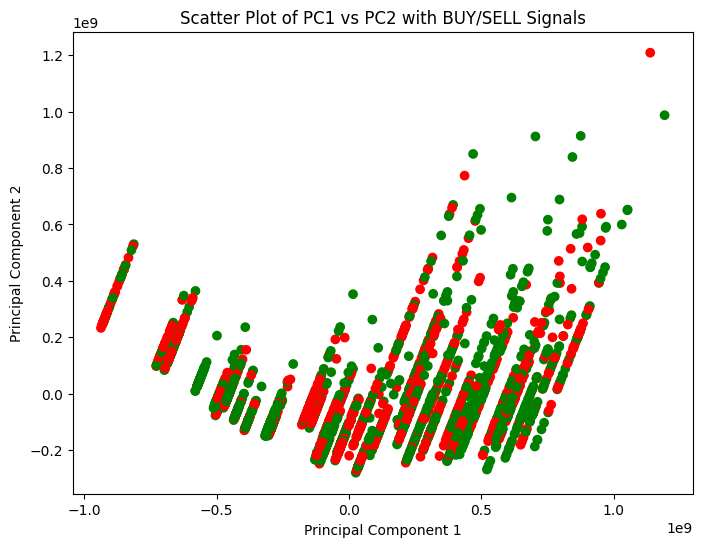

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=new_df['signal'].map({'BUY': 'green', 'SELL': 'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PC1 vs PC2 with BUY/SELL Signals')
plt.show()

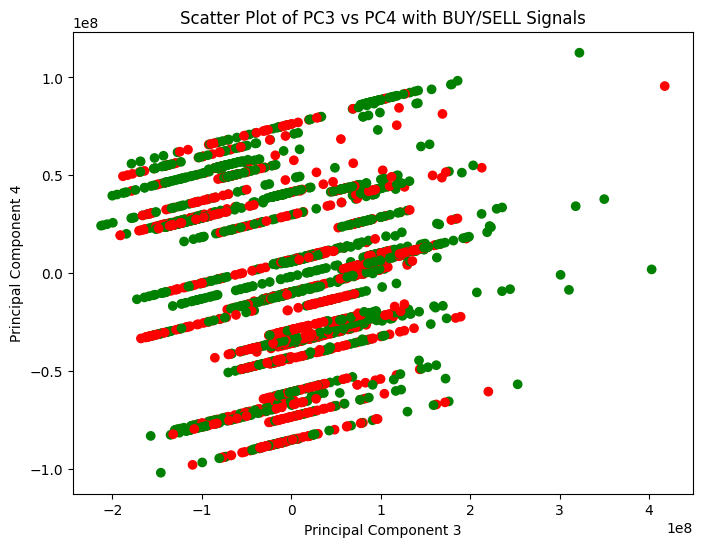

In [95]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC3'], pca_df['PC4'], c=new_df['signal'].map({'BUY': 'green', 'SELL': 'red'}))
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('Scatter Plot of PC3 vs PC4 with BUY/SELL Signals')
plt.show()

In [96]:
df.to_csv('../datasets/processed/eda.csv')
df_numeric.to_csv('../datasets/processed/numeric_data.csv')
pca_df.to_csv('../datasets/processed/pca_data.csv')
top_10_correlations.to_csv('../datasets/processed/top_10_correlations.csv')